# Introduction to Pandas

## Introduction
* Pandas is a newer package built on top of NumPy
* Pandas provides an efficient implementation of a DataFrame
* DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. 
* Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs
* documentation: http://pandas.pydata.org/pandas-docs/stable/

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use("default")


In [6]:
data = pd.DataFrame(np.random.randn(50, 5))
# Make sure the directory exists
os.makedirs('data', exist_ok=True)
data.to_csv('data/test_csv1.csv', sep=';', index_label=['a', 'b', 'c', 'd', 'e', 'f'], decimal=',')
data.to_excel('data/test_excel1.xlsx')

## Read csv-data

http://pandas.pydata.org/pandas-docs/stable/io.html#

In [21]:
data_csv = pd.read_csv('data/test_csv.csv')
data_csv.head()

,,,,,a;b;c;d;e;f;0;1;2;3;4
0;-0,4246870298859013;0,5522841912772913;-2,0658928525318294;-0,788852447945441;2,1817491144594205
1;0,04288126537219558;-0,7745748070599539;0,12781116369777581;-0,36667016542912645;0,7957944155261677
2;0,41465181383767163;0,03693794884465033;3,0639141396822165;-1,1472868710994484;-0,7318755035784512
3;-2,8496780177553274;-0,1415295903889285;-1,2528915220213925;-0,2119260073744855;-0,10468443969813844
4;1,2374439077675505;0,3938875662347796;-0,20760734823858776;-0,7425926227129656;0,16619117325650068


In [22]:
# sometimes you have to give some more details to read the csv correctly

data_csv = pd.read_csv('data/test_csv.csv', sep=';', decimal=',', usecols=(0, 1, 2, 3, 4))
data_csv.head()

,a,b,c,d,e
0,0,-0.424687,0.552284,-2.065893,-0.788852
1,1,0.042881,-0.774575,0.127811,-0.366670
2,2,0.414652,0.036938,3.063914,-1.147287
3,3,-2.849678,-0.141530,-1.252892,-0.211926
4,4,1.237444,0.393888,-0.207607,-0.742593


## Basic Operations on Data Frames

In [23]:
# shape of the data frame

data_csv.shape

(50, 5)

In [24]:
# filter rows of the data frame

data_csv = data_csv.query('a < 0.8 | c > 0')
data_csv.head()

,a,b,c,d,e
0,0,-0.424687,0.552284,-2.065893,-0.788852
2,2,0.414652,0.036938,3.063914,-1.147287
4,4,1.237444,0.393888,-0.207607,-0.742593
6,6,1.493295,0.319811,1.947756,-1.795701
13,13,1.683426,0.512369,-0.067183,0.615619


In [25]:
# filter columns of the data frame

data_csv = data_csv.filter(items=['a', 'b', 'c'])
print(data_csv.shape)
data_csv.head()

(18, 3)


,a,b,c
0,0,-0.424687,0.552284
2,2,0.414652,0.036938
4,4,1.237444,0.393888
6,6,1.493295,0.319811
13,13,1.683426,0.512369


In [26]:
# sort the data frame

data_csv = data_csv.sort_values(by=['c'])
data_csv.head()

,a,b,c
2,2,0.414652,0.036938
39,39,-0.302028,0.091859
27,27,0.942635,0.123114
31,31,0.300276,0.128002
21,21,0.371740,0.128198


In [27]:
# set index

data_csv = data_csv.set_index(keys=['a'])
data_csv = data_csv.sort_values(by=['a'])
data_csv.head()

,b,c
a,,
0,-0.424687,0.552284
2,0.414652,0.036938
4,1.237444,0.393888
6,1.493295,0.319811
13,1.683426,0.512369


### Indexing

In [28]:
# save a new csv

data_csv.to_csv('data/test_neue_csv.csv', sep=';', decimal=',')

## Statistical Operations

In [29]:
data_csv.sum()

b    -0.763346
c    10.802686
dtype: float64

In [30]:
data_csv.mean()

b   -0.042408
c    0.600149
dtype: float64

In [31]:
data_csv.median()

b    0.234007
c    0.444116
dtype: float64

In [32]:
data_csv.std()

b    1.105430
c    0.675003
dtype: float64

In [33]:
data_csv['b'].describe()

count    18.000000
mean     -0.042408
std       1.105430
min      -2.240860
25%      -0.995039
50%       0.234007
75%       0.745726
max       1.683426
Name: b, dtype: float64

## Plotting functions

<AxesSubplot: xlabel='a'>

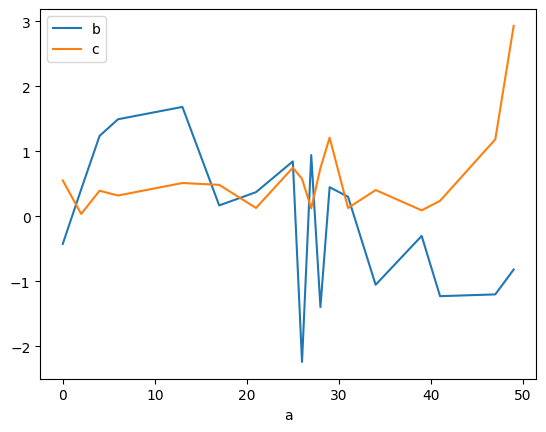

In [34]:
data_csv.plot()

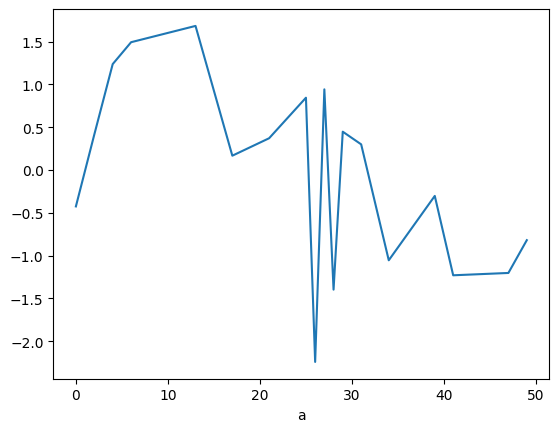

In [35]:
plt.figure()
data_csv['b'].plot()
plt.show()

## Read excel-data

In [36]:
data_excel = pd.read_excel('data/test_excel.xlsx')
data_excel.head()

,Unnamed: 0,0,1,2,3,4
0,0,-0.424687,0.552284,-2.065893,-0.788852,2.181749
1,1,0.042881,-0.774575,0.127811,-0.366670,0.795794
2,2,0.414652,0.036938,3.063914,-1.147287,-0.731876
3,3,-2.849678,-0.141530,-1.252892,-0.211926,-0.104684
4,4,1.237444,0.393888,-0.207607,-0.742593,0.166191
